# 4_动能指标策略
*用动能指标交易*

## 目录

- 什么是动能指标?
- MOM/MACD/RSI/Stochastic是怎么计算的?
- 如何用图像展示动能指标？
- 如何用动能指标做策略?

## 什么是动能指标?
动能指标对价格的计算与物理学中对速度的计算相似，需要知道价格移动的距离、时间、移动的速度与加速度，这些变化都反映着市场价格在不同维度上的变化。动能指标的类型主要有两种，一种是Momentum 指标，它有中间轴，可以是0或100，上下没有界限；另一种是Oscillator 振荡器，它的取值在0至100之间。

## MOM/MACD/RSI/Stochastic是怎么计算的?

---

### 1. Momentum

$ROCR100=(Rrice_t/prevPrice_{t-10})*100$

---

### 2. MACD
$MACD = 26'day 'EMA - 12'day'EMA$

$MACD'signal=9'day 'EMA(MACD)$

$Hist = MACD - MACD' signal$

---

### 3. RSI

$RSI=100-\frac{100}{1+RS}$

$RS=\frac{\text{average of net UP closing changes for selected period of days}}{\text{average of net DOWN closing changes for selected period of days}}$

---

### 4. Stochastic
$Fast'K=\frac{C_t-L_n}{H_n-L_n}$

$Slow'K=MA(Fast'K,3)$

$Slow'D=MA(Slow'K,3)$

## 如何用图像展示动能指标？

In [1]:
from jaqs_fxdayu.data import DataView
from jaqs_fxdayu.data import RemoteDataService
import numpy as np
import talib as ta
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

dataview_folder = '../Factor'
dv = DataView()
dv.load_dataview(dataview_folder)

D:\Anaconda3\lib\importlib\__init__.py:126: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return _bootstrap._gcd_import(name[level:], package, level)


Dataview loaded successfully.


In [2]:
def change_index(df):
    df.index = pd.Index(map(lambda x: datetime.strptime(str(x),"%Y%m%d") , df.index))
    return df
data = change_index(dv.get_ts('close_adj').loc[20170105:])

In [3]:
symbol= ['000001.SZ','600036.SH','600050.SH','000008.SZ','000009.SZ']

In [4]:
price_dict = {name: data[name] for name in symbol}

In [5]:
data_mom = pd.DataFrame({item: ta.ROCR100(value.values,20) for item,value in price_dict.items()},index=data.index).dropna()

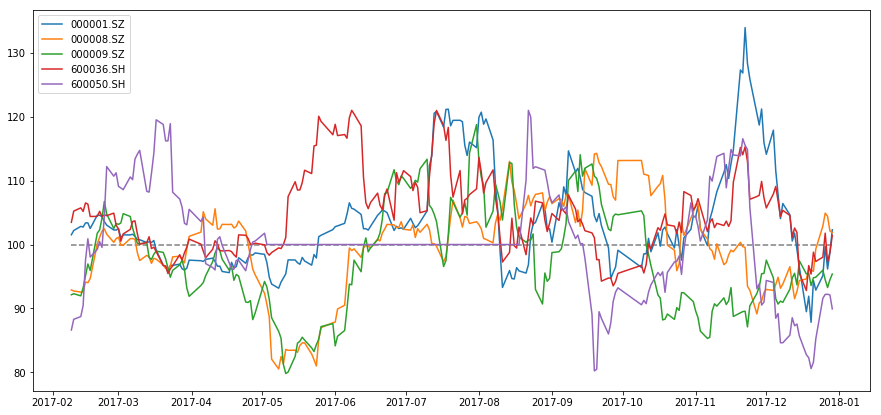

In [6]:
fig = plt.figure(figsize=(15, 7))
plt.plot(data_mom)
plt.hlines(100,data_mom.index[0],data_mom.index[-1] , linestyles='dashed', alpha=0.5)
plt.legend(data_mom.columns, loc='upper left')
plt.show()

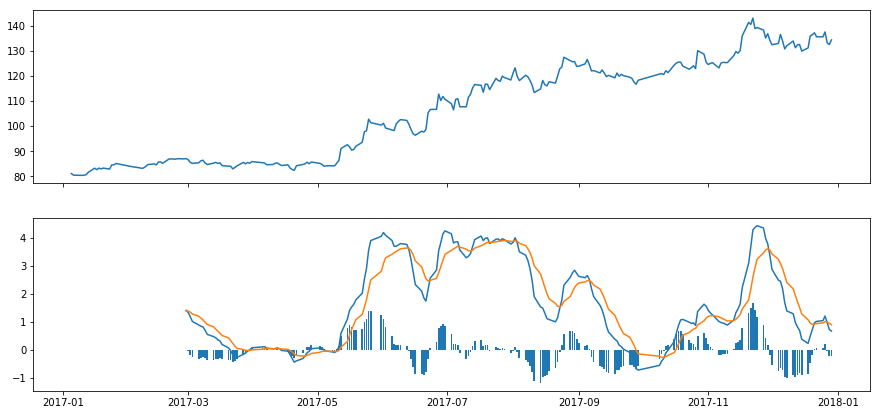

In [7]:
#MACD

macd = ta.abstract.MACD(data, price='600036.SH')

# macd
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
ax.plot(macd.index, data['600036.SH'])
ax1.plot(macd.index, macd['macd'])
ax1.plot(macd.index, macd['macdsignal'])
ax1.bar(macd.index, macd['macdhist'])
plt.show()

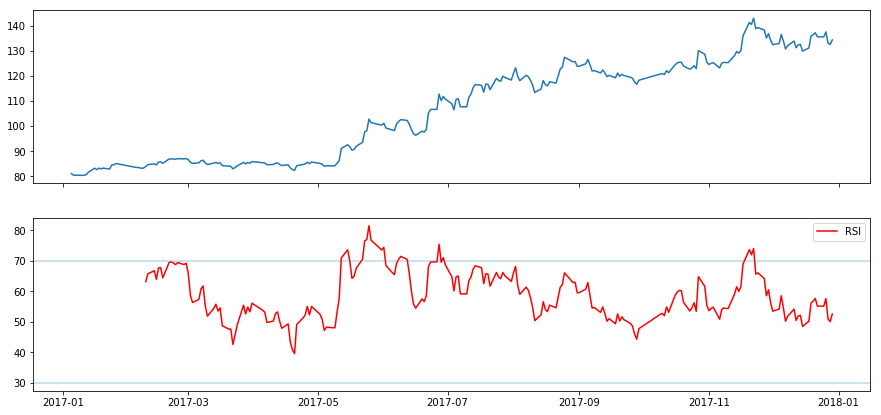

In [8]:
#RSI
RSI = ta.abstract.RSI(data,20, price='600036.SH')

fig, (ax, ax1) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
ax.plot(data['600036.SH'])
ax1.plot(RSI,'r', label='RSI')
ax1.axhline(70,alpha=0.3)
ax1.axhline(30,alpha=0.3)
plt.legend()
plt.show()

In [9]:
high = change_index(dv.get_ts('high_adj').loc[20170105:])['600036.SH'].values
low = change_index(dv.get_ts('low_adj').loc[20170105:])['600036.SH'].values
close = change_index(dv.get_ts('close_adj').loc[20170105:])['600036.SH'].values

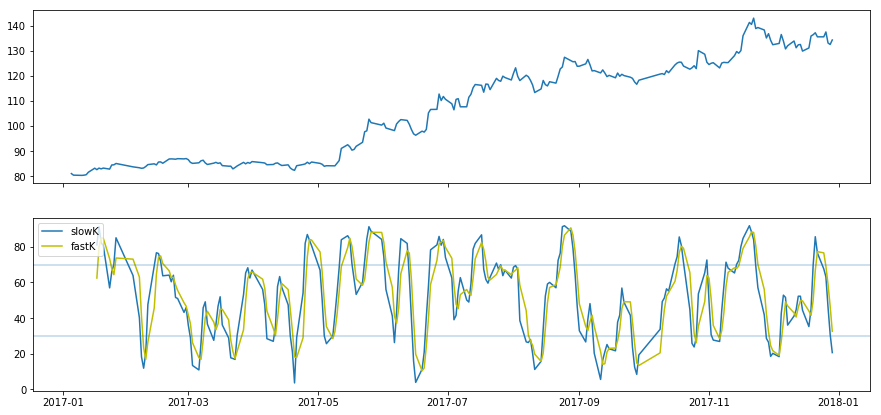

In [10]:
#Stochastic
k,d = ta.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
KDJ = pd.concat([pd.Series(k,index=data.index), pd.Series(d,index=data.index)], axis=1, keys=['slowk','slowd'])

fig, (ax, ax1) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
ax.plot(data['600036.SH'])
ax1.plot(KDJ['slowk'], label='slowK')
ax1.plot(KDJ['slowd'],'y', label='fastK')
ax1.axhline(70,alpha=0.3)
ax1.axhline(30,alpha=0.3)
plt.legend(loc='upper left')
plt.show()

## 如何用动能指标做策略?

**1. 图表的领先形态（Charting Patterns-Leading ahead）:**
可以通过观察指标对价格做领先的形态或走势判断。

**2. 交叉信号（Cross Signals）：**
快线高于慢线金叉，看涨；快线低于慢线死叉，看跌。

**3. 柱的斜率（The slope of MACD-Histogram）：**
当前的柱比前一根高，看涨；当前的柱比前一根低，看跌。

**4. 超买超卖（Overbought/OverSold）：**
当振荡器高于上方的值如RSI(70)为超买，低于下方的值如RSI(30)为超卖，超卖买入，超买卖出。

**5. 背离（Divergence）：**
价格创新高，而指标没有创新高，顶背离，看跌。
价格创新低，而指标没有创新低，底背离，看涨。


## RSI判断超买超卖方法: 
**底背离买入：**
RSI< 30

**顶背离卖出：**
RSI>70

         when using: `python -m better_exceptions'. Otherwise, only code
         loaded from files will be inspected!


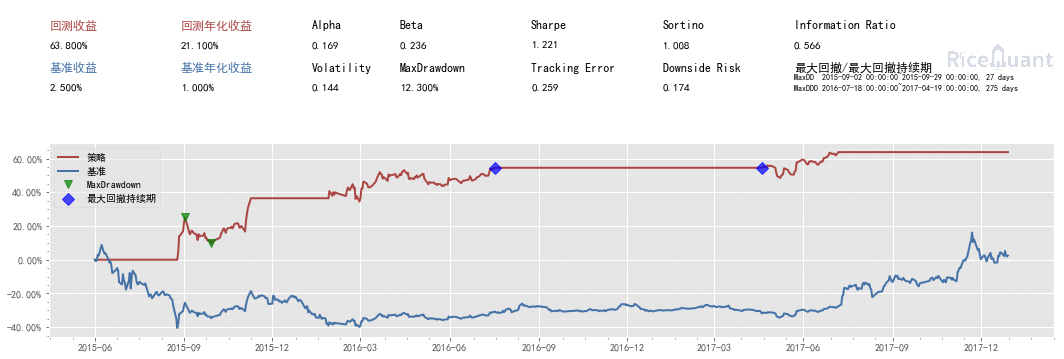

{'sys_analyser': {'benchmark_portfolio':                  cash  market_value  static_unit_net_value  total_value  \
  date                                                                      
  2015-06-01      1.300    999998.700                  1.000  1000000.000   
  2015-06-02      1.300    991822.610                  1.000   991823.910   
  2015-06-03      1.300    995596.190                  0.992   995597.490   
  2015-06-04      1.300   1029558.410                  0.996  1029559.710   
  2015-06-05      1.300   1025155.900                  1.030  1025157.200   
  2015-06-08      1.300   1087419.970                  1.025  1087421.270   
  2015-06-09      1.300   1067923.140                  1.087  1067924.440   
  2015-06-10      1.300   1049055.240                  1.068  1049056.540   
  2015-06-11      1.300   1036476.640                  1.049  1036477.940   
  2015-06-12      1.300   1038363.430                  1.036  1038364.730   
  2015-06-15      1.300   1001256.560

In [11]:
# Bollinger Band
import rqalpha
from rqalpha.api import *
import talib

def init(context):
    context.s1 = "000001.XSHE"
    context.PERIOD = 20

    

def handle_bar(context, bar_dict):
    price = history_bars(context.s1, context.PERIOD*2+1, '1d', 'close')
    RSI = talib.RSI(price, 20)

    cur_position = context.portfolio.positions[context.s1].quantity
    shares = context.portfolio.cash/bar_dict[context.s1].close
   
    if RSI[-1]>70:
        order_target_value(context.s1, 0)
    
    if RSI[-1]<30:
        order_shares(context.s1, shares)

config = {
  "base": {
    "start_date": "2015-06-01",
    "end_date": "2017-12-30",
    "accounts": {'stock':1000000},
    "benchmark": "000001.XSHE"
  },
  "extra": {
    "log_level": "error",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

rqalpha.run_func(init=init, handle_bar=handle_bar, config=config)

## 作业
根据RSI背离策略例子，写出其他的动能策略